# Import/examine CrossCheck dataset

In [1]:
import sys
# Make imports work
sys.path.insert(0, '../')

In [11]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mhealth_anomaly_detection import plots
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import datasets
from mhealth_anomaly_detection import anomaly_detection as ad 
from mhealth_anomaly_detection import load_refs as lr

In [3]:
importlib.reload(datasets)

crosscheck = datasets.CrossCheck()
crosscheck.data.head()

,study_id,eureka_id,day,act_in_vehicle_ep_0,act_in_vehicle_ep_1,act_in_vehicle_ep_2,act_in_vehicle_ep_3,act_in_vehicle_ep_4,act_on_bike_ep_0,act_on_bike_ep_1,...,unlock_duration_ep_4,unlock_num_ep_0,unlock_num_ep_1,unlock_num_ep_2,unlock_num_ep_3,unlock_num_ep_4,date,subject_id,first_day,study_day
0,84.0,u005,20150121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-21,84,2015-01-21,0
1,84.0,u005,20150122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-22,84,2015-01-21,1
2,84.0,u005,20150123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-23,84,2015-01-21,2
3,84.0,u005,20150124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-24,84,2015-01-21,3
4,84.0,u005,20150125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-25,84,2015-01-21,4


<AxesSubplot: xlabel='date', ylabel='study_id'>

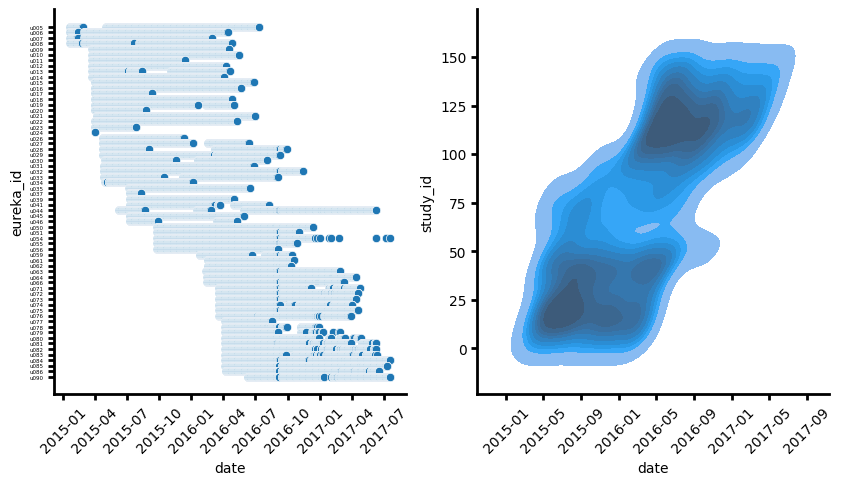

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(
    y='eureka_id',
    x='date',
    data=crosscheck.data,
    ax=axes[0]
)
fa.despine_thicken_axes(axes[0], fontsize=10, y_tick_fontsize=4, x_rotation=45)

sns.kdeplot(
    y='study_id',
    x='date',
    data=crosscheck.data,
    ax=axes[1],
    fill=True
)
fa.despine_thicken_axes(axes[1], fontsize=10, x_rotation=45)


In [5]:
daily_passive_features = [
    'act_in_vehicle_ep_0',
    'act_on_bike_ep_0',
    'act_on_foot_ep_0',
    'act_still_ep_0',
    'act_tilting_ep_0',
    'act_unknown_ep_0',
    'audio_amp_mean_ep_0',
    'audio_convo_duration_ep_0',
    'audio_convo_num_ep_0',
    'audio_voice_ep_0',
    'call_in_duration_ep_0',
    'call_in_num_ep_0',
    'call_miss_num_ep_0',
    'call_out_duration_ep_0',
    'call_out_num_ep_0',
    'light_mean_ep_0',
    'light_mean_ep_1',
    'light_mean_ep_4',
    'light_std_ep_0',
    'loc_dist_ep_0',
    'loc_visit_num_ep_0',
    'sms_in_num_ep_0',
    'sms_out_num_ep_0',
    'unlock_duration_ep_0',
    'unlock_num_ep_0'
]

  0%|          | 0/61 [00:05<?, ?it/s]


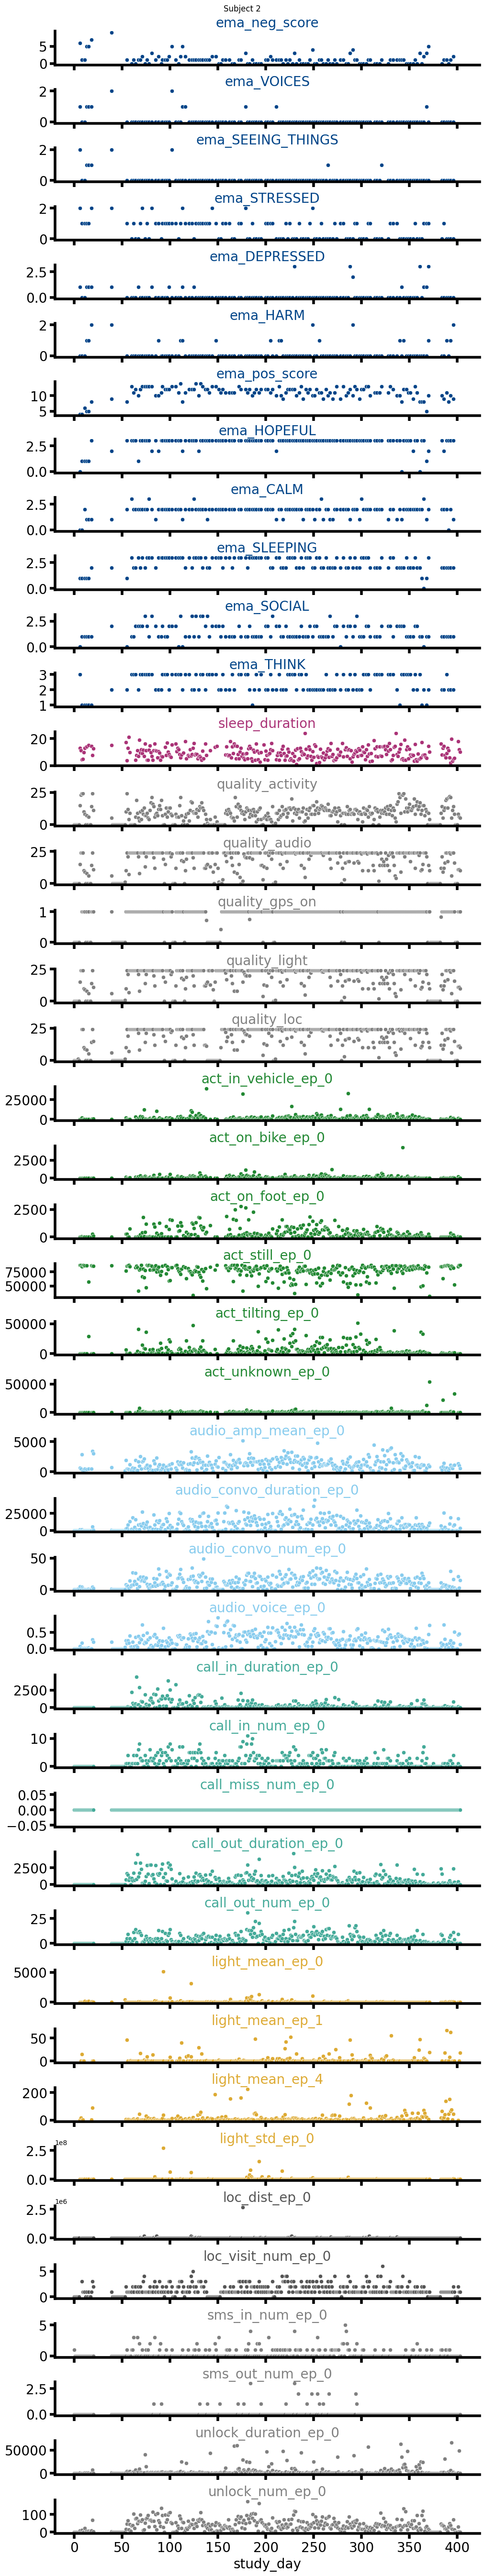

In [16]:
from pathlib import Path
from tqdm.auto import tqdm
importlib.reload(plots)

#daily_passive_features = [c for c in crosscheck.feature_cols if c[-2:] == '_0']
plot_features = [
    'ema_neg_score',
    'ema_VOICES',
    'ema_SEEING_THINGS',
    'ema_STRESSED',
    'ema_DEPRESSED',
    'ema_HARM',
    'ema_pos_score',
    'ema_HOPEFUL',
    'ema_CALM',
    'ema_SLEEPING',
    'ema_SOCIAL',
    'ema_THINK',
    'sleep_duration',
    'quality_activity',
    'quality_audio',
    'quality_gps_on',
    'quality_light',
    'quality_loc',
    *daily_passive_features
]

fig_dir = Path('..', 'output', 'crosscheck', 'lineplot')
fig_dir.mkdir(
    parents=True,
    exist_ok=True
)
palette = lr.get_colors('../lib/colors.json')

# Plot the data for each subject
for sid, subject_data in tqdm(crosscheck.data.groupby('subject_id')):
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date', 'first_day'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid}')
    fname = Path(fig_dir, f'{sid}_lineplot.png')
    fig.savefig(fname)
    #plt.close()
    break

In [ ]:
palette['features']

In [ ]:
for f in crosscheck.feature_cols:
    if f.startswith('ema_'):
        print(
            '"' + f + '": "#004488",',
        )
    elif f.startswith('act_'):
        print(
            '"' + f + '": "#228833",',
        )
    elif f.startswith('sleep_'):
        print(
            '"' + f + '": "#AA3377",',
        )
    elif f.startswith('light_'):
        print(
            '"' + f + '": "#DDAA33",',
        )
    elif f.startswith('audio_'):
        print(
            '"' + f + '": "#88CCEE",',
        )
    elif f.startswith('call_'):
        print(
            '"' + f + '": "#44AA99",',
        )
    elif f.startswith('loc_'):
        print(
            '"' + f + '": "#555555",',
        )
    else:
        print(
            '"' + f + '": "gray",',
        )


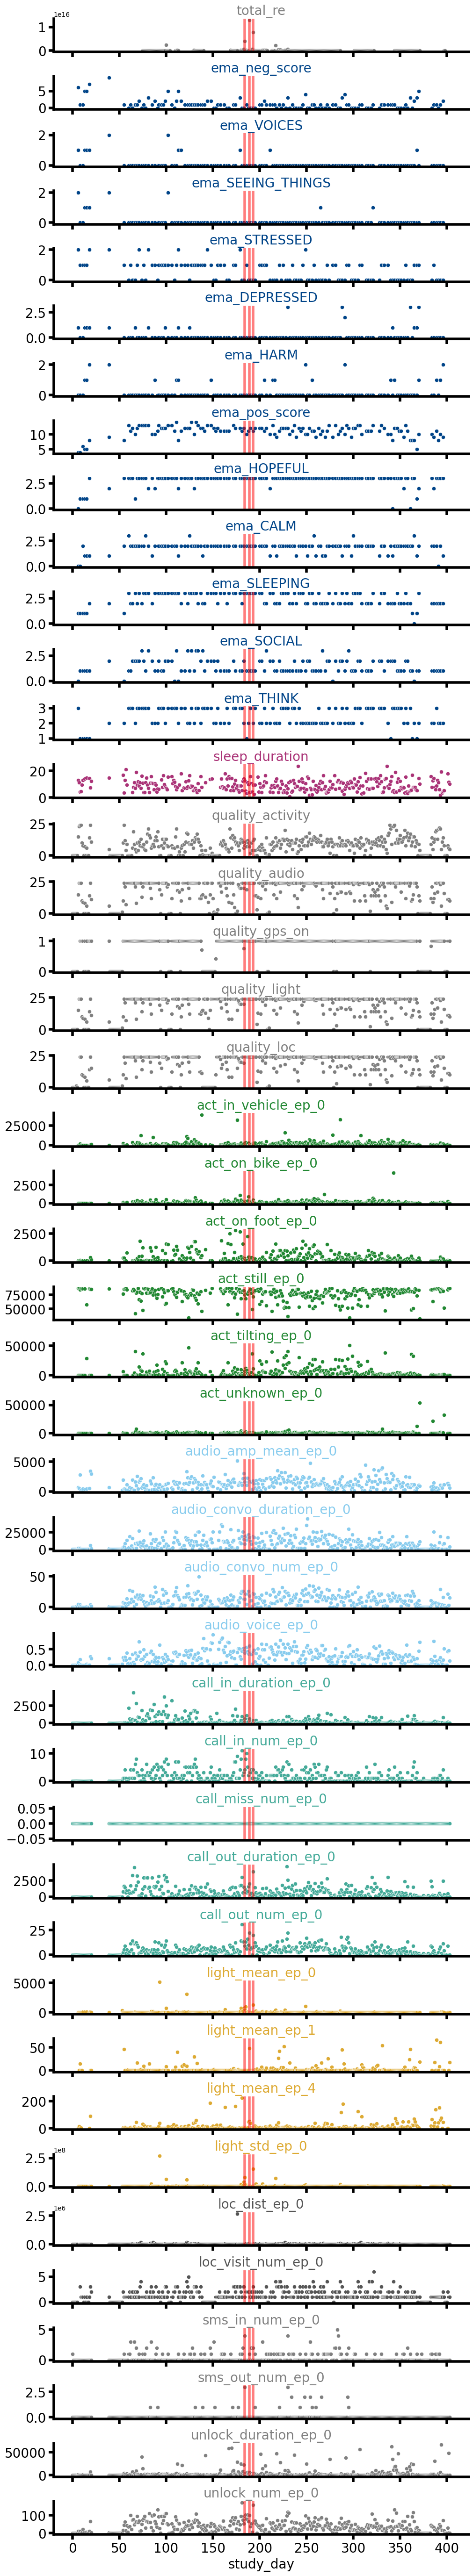

In [36]:
importlib.reload(ad)
subject_id = 2
subject_data = crosscheck.data[crosscheck.data.subject_id == subject_id].reset_index()

# Rolling 7 day PCA based anomaly detection
anomalyDetector = ad.BaseRollingAnomalyDetector(
    features=daily_passive_features,
    n_components=5,
    window_size=14,
    max_missing_days=4,
)

# Get reconstruction error and use to do anomaly labeling
reconstruction_error, pca_components = anomalyDetector.getReconstructionError(subject_data)
subject_data['anomaly'] = anomalyDetector.labelAnomaly(reconstruction_error)
subject_data['total_re'] = reconstruction_error['total_re']

# Plot features with anomalies labeled
plots.lineplot_features(
    subject_data,
    [
        'total_re',
        *plot_features
    ],
    anomaly_col='anomaly',
    palette=palette,
    scatter=True,
);